In [1]:
# Importacion de todas las librerias necesarias para la implementacion
# y ejecucion del modelo
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.svm import SVC  

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from keras import backend as K
%matplotlib inline

In [2]:
# Leemos el archivo de excel, este archivo contiene todos los datos procesados y listos para 
# ser enviador al modelo. Este cuenta con un total de 749 registros y 6 columnas
# que corresponden a la personalidad.
datos = pd.read_excel("DatosLimpios_2Y.xlsx", names=['Animado', 'Confiable', 'Extravertido', 'Responsable', 'Serio','estilo'])
datos

,Animado,Confiable,Extravertido,Responsable,Serio,estilo
5,1,0,0,0,0,1
6,0,0,0,1,0,1
11,0,0,0,0,1,1
12,0,0,0,0,1,1
13,1,0,0,0,0,1
...,...,...,...,...,...,...
2197,0,0,0,1,0,0
2200,0,1,0,0,0,0
2201,1,0,0,0,0,1
2204,1,0,0,0,0,1


In [3]:
# Se realiza la separacion de los datos de entrada y los datos de salida
# Para los datos de entrada se toman todas las columnas a expecion de la ulimta
# que corresponde a la columna de estilo, y para los datos de salida se unicamente
#  toma la columna de estilo.

datos = datos.values
X = datos[:, :-1]
y = datos[:,-1]

In [4]:
# Se dividen los datos en 2 partes, el 70% para el entrenamiento del modelo
# y el 30% para las pruebas y evaluacion del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [5]:
# Funciones para el calculo de las metricas de recall, precision y f1
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [6]:

# Inicio de la red neuronal
network = models.Sequential()

# Añadir una capa totalmente conectada con una función de activación ReLU
network.add(layers.Dense(units=5, activation='relu', input_shape=(5,)))

# Añade una capa totalmente conectada con una función de activación sigmoidea
network.add(layers.Dense(units=1,activation='sigmoid'))

# Compila el modelo de la red neuronal, a este se le envian varios hiperparametros
network.compile(loss='binary_crossentropy', # Funcion de perdidad de binary_crossentropy 
                    optimizer='Adam', # La funcion de optimizacion para el aprendizaje
                    metrics=['accuracy',f1_m,precision_m, recall_m]) # Metricas a evaluar por el modelo
# Compilacion del modelo
Hist=network.fit(X_train, y_train, epochs=100, batch_size=10)


Epoch 1/100
53/53 [==============================] - 3s 4ms/step - loss: 0.6792 - accuracy: 0.7080 - f1_m: 0.7490 - precision_m: 0.6749 - recall_m: 0.8868
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: 0.6722 - accuracy: 0.7080 - f1_m: 0.7491 - precision_m: 0.6775 - recall_m: 0.8853
Epoch 3/100
53/53 [==============================] - 0s 4ms/step - loss: 0.6648 - accuracy: 0.7080 - f1_m: 0.7372 - precision_m: 0.6686 - recall_m: 0.8601
Epoch 4/100
53/53 [==============================] - 0s 4ms/step - loss: 0.6577 - accuracy: 0.7080 - f1_m: 0.7536 - precision_m: 0.6824 - recall_m: 0.8759
Epoch 5/100
53/53 [==============================] - 0s 3ms/step - loss: 0.6508 - accuracy: 0.7080 - f1_m: 0.7593 - precision_m: 0.6783 - recall_m: 0.8974
Epoch 6/100
53/53 [==============================] - 0s 3ms/step - loss: 0.6444 - accuracy: 0.7080 - f1_m: 0.7513 - precision_m: 0.6795 - recall_m: 0.8894
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - los

In [7]:
# Evaluacion del modelo con los datos de prueba
scores = network.evaluate(X_test, y_test, verbose=0)
# Presentacion de Accurary del modelo
print("\n%s: %.2f%%" % (network.metrics_names[1], scores[1]*100))
# Presentacion de F1 del modelo
print("\n%s: %.2f%%" % (network.metrics_names[2], scores[2]*100))
# Presentacion de la Precision del modelo
print("\n%s: %.2f%%" % (network.metrics_names[3], scores[3]*100))
# Presentacion del Recall del modelo
print("\n%s: %.2f%%" % (network.metrics_names[4], scores[4]*100))


accuracy: 68.89%

f1_m: 62.95%

precision_m: 58.75%

recall_m: 70.93%


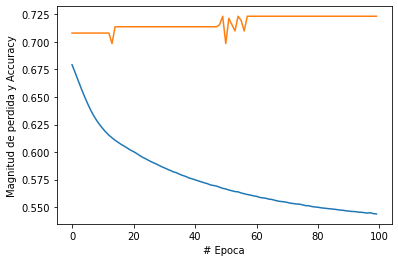

In [8]:
# Grafico de la funcion de perdida y el valor del accuracy en funcion del 
# numero de epochs
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de perdida y Accuracy")
plt.plot(Hist.history["loss"])
plt.plot(Hist.history["accuracy"])

In [9]:
# Se obtiene los valores de prediccion y se grafica la 
# matriz de confusion
y_pred = network.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

array([[62, 46],
       [24, 93]])

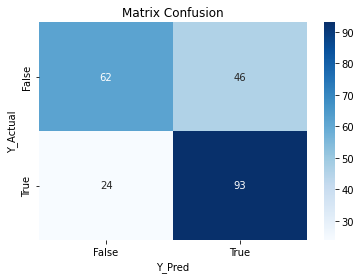

In [10]:
#Graficacion de la matriz de confusion
ax = sns.heatmap(cm, annot=True, cmap='Blues')
# etiquetas de X e Y
ax.set_title('Matrix Confusion');
ax.set_xlabel('Y_Pred')
ax.set_ylabel('Y_Actual');

# Sub etiquetas de X e Y
ax.xaxis.set_ticklabels(["False","True"])
ax.yaxis.set_ticklabels(["False","True"])

# Se manda a visuluzar la matriz de confusion.
plt.show()

In [11]:
# Se establece la funcion de la red neuronal para ser utilizada por el 
# CrossFolding
def create_network():
    network = models.Sequential()
    network.add(layers.Dense(units=5, activation='relu', input_shape=(5,)))
    network.add(layers.Dense(units=1,activation='sigmoid'))
    network.compile(loss='binary_crossentropy', #mean_squared_error
                    optimizer='Adam', # Root Mean Square Propagation
                    metrics=['accuracy',f1_m,precision_m, recall_m]) # Accuracy performance metric 
    return network

In [12]:

neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=200, 
                                 batch_size=10, 
                                 verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """


In [13]:
# Evaluar la red neuronal utilizando la validación cruzada three-fold cross-validation
cross_val_score(neural_network, X_test, y_test, cv=3)

array([0.62666667, 0.58666664, 0.61333334])

In [14]:
# Se pasan los valores de entrada a la red, y esta se encarga de predecir el estilo a vestir
X_new = pd.DataFrame({'Animado': [0], 'Confiable': [0], 'Extravertido': [0], 'Responsable': [0], 'Serio': [1]})


In [15]:

Resultado= network.predict([X_new])
out= Resultado.round().astype(int)
if out == 1:
  print("Su estilo es casual")
if out == 0:
  print("Su estilo es modesto")

Su estilo es casual
